In [2]:
'''
Ref:
    https://www.twblogs.net/a/5d04fd8fbd9eee487be9b30e
    

'''
import torch.nn as nn
import torch
import torch.utils.data
import math
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from os import listdir
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision
import seaborn as sns
from sklearn.manifold import TSNE
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


torch.Size([2000, 2])



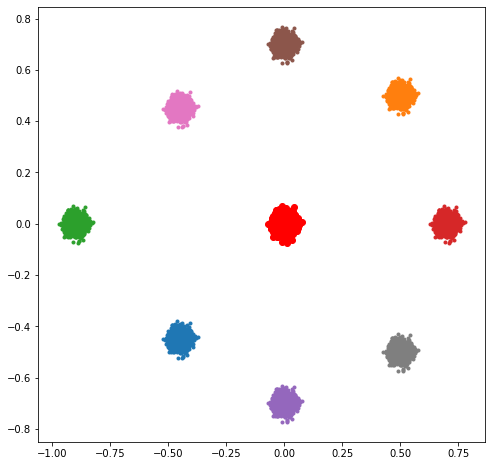

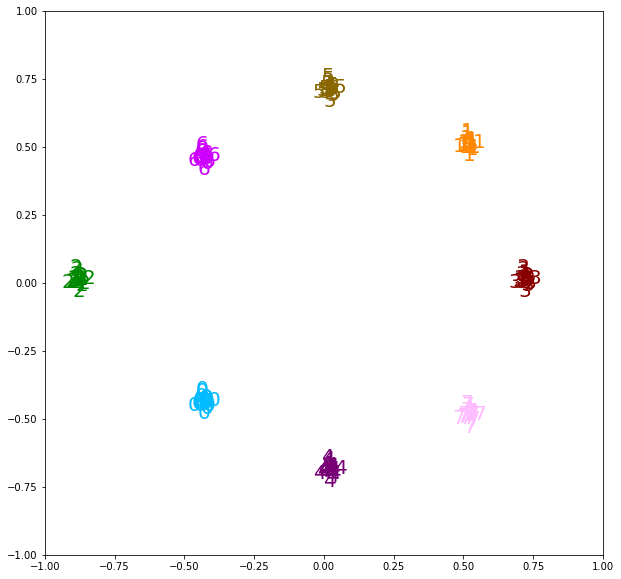

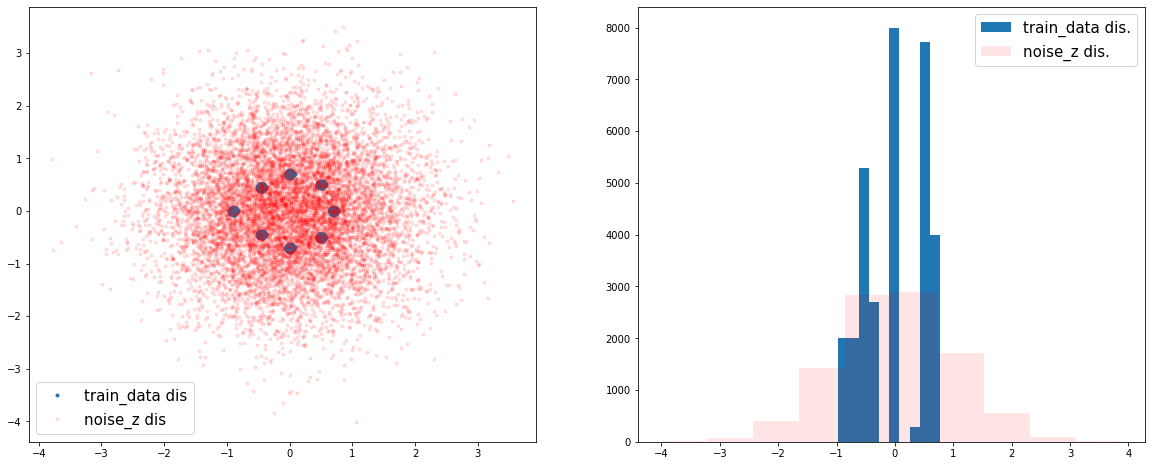

In [3]:
Train_Data = []
Train_Label = []
Test_z = []
plt.clf
plt.close('all')
d_size = [2000, 2]

sample_dis_center = torch.from_numpy(np.random.normal( 0,  0.02, size = d_size)).type(torch.FloatTensor)
sample_dis_0 = sample_dis_center - 0.45 # label = 0-左下
sample_dis_1 = sample_dis_center + 0.5 # label = 1-右上
sample_dis_2 = torch.cat([(sample_dis_center[:, :1] - 0.9), sample_dis_center[:, 1:] ], dim = 1) # label = 2-左
sample_dis_3 = torch.cat([(sample_dis_center[:, :1] + 0.7), sample_dis_center[:, 1:] ], dim = 1) # label = 3-右
sample_dis_4 = torch.cat([(sample_dis_center[:, :1]), (sample_dis_center[:, 1:] -0.7)], dim = 1) # label = 4-下
sample_dis_5 = torch.cat([(sample_dis_center[:, :1]), (sample_dis_center[:, 1:] +0.7)], dim = 1) # label = 5-上
sample_dis_6 = torch.cat([ (sample_dis_center[:, :1] - 0.45), (sample_dis_center[:, 1:] + 0.45) ], dim = 1) # label = 6-左上
sample_dis_7 = torch.cat([ (sample_dis_center[:, :1] + 0.5), (sample_dis_center[:, 1:] - 0.5) ], dim = 1) # label = 7-右下

print(sample_dis_1.size())
# Train_Data = torch.cat ([sample_dis_1, sample_dis_2] , dim = 0)

fig = plt.figure(figsize = (8, 8))
plt.plot(sample_dis_center[:, 0].data.numpy(), sample_dis_center[:, 1].data.numpy(), 'o', color = 'r')
plt.plot(sample_dis_0[:, 0].data.numpy(), sample_dis_0[:, 1].data.numpy(), '.')
plt.plot(sample_dis_1[:, 0].data.numpy(), sample_dis_1[:, 1].data.numpy(), '.')
plt.plot(sample_dis_2[:, 0].data.numpy(), sample_dis_2[:, 1].data.numpy(), '.')
plt.plot(sample_dis_3[:, 0].data.numpy(), sample_dis_3[:, 1].data.numpy(), '.')
plt.plot(sample_dis_4[:, 0].data.numpy(), sample_dis_4[:, 1].data.numpy(), '.')
plt.plot(sample_dis_5[:, 0].data.numpy(), sample_dis_5[:, 1].data.numpy(), '.')
plt.plot(sample_dis_6[:, 0].data.numpy(), sample_dis_6[:, 1].data.numpy(), '.')
plt.plot(sample_dis_7[:, 0].data.numpy(), sample_dis_7[:, 1].data.numpy(), '.')


# train_data 
Train_Data = torch.cat([sample_dis_0, sample_dis_1, sample_dis_2, sample_dis_3, 
                       sample_dis_4, sample_dis_5, sample_dis_6, sample_dis_7], dim = 0)
sample_label_0 = torch.zeros(sample_dis_0.size(0), 1)
sample_label_1 = torch.ones(sample_dis_0.size(0), 1)
sample_label_2 = torch.ones(sample_dis_0.size(0), 1)*2
sample_label_3 = torch.ones(sample_dis_0.size(0), 1)*3
sample_label_4 = torch.ones(sample_dis_0.size(0), 1)*4
sample_label_5 = torch.ones(sample_dis_0.size(0), 1)*5
sample_label_6 = torch.ones(sample_dis_0.size(0), 1)*6
sample_label_7 = torch.ones(sample_dis_0.size(0), 1)*7

# train_label 
Train_Label = torch.cat([sample_label_0, sample_label_1, sample_label_2, sample_label_3, 
                        sample_label_4, sample_label_5, sample_label_6, sample_label_7])
fig = plt.figure(figsize = (10, 10))
for kk in range(20):
    plt.text(sample_dis_0[kk:kk+1, 0].data.numpy(), sample_dis_0[kk:kk+1, 1].data.numpy(), '0', fontsize = 20, color = '#00BBFF')
    plt.text(sample_dis_1[kk:kk+1, 0].data.numpy(), sample_dis_1[kk:kk+1, 1].data.numpy(), '1', fontsize = 20, color = '#FF8800')
    plt.text(sample_dis_2[kk:kk+1, 0].data.numpy(), sample_dis_2[kk:kk+1, 1].data.numpy(), '2', fontsize = 20, color = '#008800')
    plt.text(sample_dis_3[kk:kk+1, 0].data.numpy(), sample_dis_3[kk:kk+1, 1].data.numpy(), '3', fontsize = 20, color = '#880000')
    plt.text(sample_dis_4[kk:kk+1, 0].data.numpy(), sample_dis_4[kk:kk+1, 1].data.numpy(), '4', fontsize = 20, color = '#770077')
    plt.text(sample_dis_5[kk:kk+1, 0].data.numpy(), sample_dis_5[kk:kk+1, 1].data.numpy(), '5', fontsize = 20, color = '#886600')
    plt.text(sample_dis_6[kk:kk+1, 0].data.numpy(), sample_dis_6[kk:kk+1, 1].data.numpy(), '6', fontsize = 20, color = '#CC00FF')
    plt.text(sample_dis_7[kk:kk+1, 0].data.numpy(), sample_dis_7[kk:kk+1, 1].data.numpy(), '7', fontsize = 20, color = '#FFBBFF')
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

Test_z = torch.randn(10000, 100)

fig ,ax = plt.subplots (1, 2, figsize = (20, 8))
ax[0].plot(Train_Data[:, 0].data.numpy(), Train_Data[:, 1].data.numpy(), '.', label='train_data dis')
ax[0].plot(Test_z[:, 0].data.numpy(), Test_z[:, 1].data.numpy(), '.', label='noise_z dis', color = 'r', alpha = 0.1)
ax[0].legend(fontsize = 15)

ax[1].hist(Train_Data.reshape(-1), label = 'train_data dis.')
ax[1].hist(Test_z[:100].reshape(-1), alpha = 0.1, label = 'noise_z dis.', color = 'r')
ax[1].legend(fontsize = 15)



print()

In [104]:
'''
Model
'''
class G_net(nn.Module):
    def __init__(self, n_dim = 128, z_dim = 100):
        super(G_net, self).__init__()
        
        self.fc1 = nn.Linear(z_dim, n_dim*8)
        self.fc2 = nn.Linear(n_dim*8, n_dim*2)
        self.fc3 = nn.Linear(n_dim*2, 2)
        
    def forward(self, noise_z):
        bs = noise_z.size(0)
        x = (self.fc1(noise_z))
        x = nn.ReLU()(self.fc2(x))
        x = torch.tanh(self.fc3 (x))
        out = x
        
        return out
    
class D_net(nn.Module):
    def __init__(self, n_dim = 128):
        super(D_net, self).__init__()
        
        self.fc1 = nn.Linear(2, n_dim*4)
        self.fc2 = nn.Linear(n_dim*4, n_dim*2)
        self.fc3 = nn.Linear(n_dim*2, 1)
    def forward(self, data):
        bs = data.size(0)
        x = (self.fc1(data))
        x = nn.ReLU()(self.fc2(x))
        out = torch.sigmoid(self.fc3 (x))
        
        return out
# ==
if __name__ == '__main__':
    bs = 32
    noise = torch.rand(bs, 100)
    data = torch.rand(bs, 2)
    
    model = G_net()
    out = model(noise)
    print('G output shape :', out.size())
    
    model = D_net()
    out = model(data)
    print('D output shape :', out.size())

G output shape : torch.Size([32, 2])
D output shape : torch.Size([32, 1])


In [4]:
# code's folder
file_path = os.getcwd()
# local date
s_date = time.strftime('%Y_%m_%d')
# save sample plot folder
folder_path_1 = 'GAN_plot'
folder_path_2 = 'start_gan_sample_plot'

Save_Path = file_path+'/'+folder_path_1+'/'+folder_path_2

if not os.path.isdir(file_path+'/'+folder_path_1):
    
    os.mkdir(file_path+'/'+folder_path_1)
else:
    print('save file folder is exsit .')
    print(file_path+'/'+folder_path_1+'\n')
    
    if not os.path.isdir(Save_Path):
        os.mkdir(Save_Path)
    else:
        print('save file folder is exsit .')
        Save_Path = Save_Path + '/'
        print(Save_Path+'\n')

        
# Dataset && DataLoader
print('Training Data shape :', Train_Data.size())
print('Training Label shape :', Train_Label.size())
Dataset = torch.utils.data.TensorDataset(Train_Data, Train_Label)
Dataloader = torch.utils.data.DataLoader(dataset = Dataset, batch_size = 32, shuffle = True)
Test_Noise_Z = torch.randn(10000, 100)
if torch.cuda.is_available():
    Test_Noise_Z = Test_Noise_Z.cuda()

save file folder is exsit .
/home/nclab62159/workspace/school_work/GAN_plot

save file folder is exsit .
/home/nclab62159/workspace/school_work/GAN_plot/start_gan_sample_plot/

Training Data shape : torch.Size([16000, 2])
Training Label shape : torch.Size([16000, 1])


training end && save


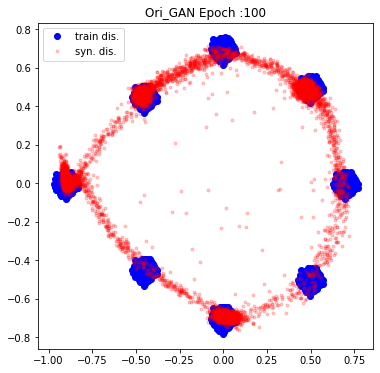

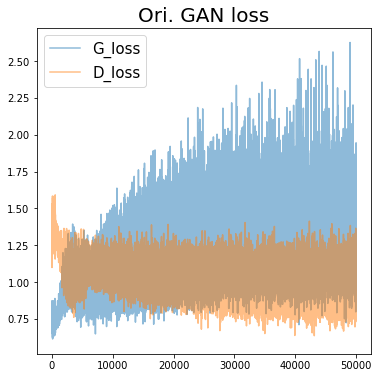

In [125]:
# vanilla-gan 
# save_folder
ori_gan_folder = s_date + '_ori_gan_sample_4/'
EPOCH = 100
z_dim = 100
#
G_net_ori = G_net()
D_net_ori = D_net()

G_optim_ori = torch.optim.Adam(G_net_ori.parameters(), lr = 0.0001)
D_optim_ori = torch.optim.Adam(D_net_ori.parameters(), lr = 0.0001)
bce_loss = nn.BCELoss()

if torch.cuda.is_available():
    G_net_ori.cuda()
    D_net_ori.cuda()
    bce_loss.cuda()
G_loss_log_ori , D_loss_log_ori = [], []
log_index = 0
for epoch in range(EPOCH):
    for n, (Data, Label) in enumerate(Dataloader):
        
        real_valid = torch.ones(Data.size(0), 1)
        fake_valid = torch.zeros(Data.size(0), 1)
        noise_z = torch.randn(Data.size(0), z_dim)
        real_data = Data
        if torch.cuda.is_available():
            real_valid = real_valid.cuda()
            fake_valid = fake_valid.cuda()
            noise_z = noise_z.cuda()
            real_data = real_data.cuda()
        # train G
        G_optim_ori.zero_grad()
        syn_data = G_net_ori(noise_z)
        g_loss = bce_loss(D_net_ori(syn_data) , real_valid)
        g_loss.backward()
        G_optim_ori.step()
        
        # train D
        D_optim_ori.zero_grad()
        d_real_loss = bce_loss(D_net_ori(real_data) , real_valid)
        d_fake_loss = bce_loss(D_net_ori(syn_data.detach()), fake_valid)
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        D_optim_ori.step()
        # 
        if log_index % 20 == 0:
            G_loss_log_ori.append(g_loss)
            D_loss_log_ori.append(d_loss)
    with torch.no_grad():
        plt.clf()
        plt.close()
        syn_dis = G_net_ori(Test_Noise_Z)
        train_dis = Train_Data
        
        if syn_dis.is_cuda:
            syn_dis = syn_dis.data.cpu().numpy()
            train_dis = train_dis.data.cpu().numpy()
        else:
            syn_dis = syn_dis.data.numpy()
            train_dis = train_dis.data.numpy()
        fig = plt.figure(figsize = (6, 6) )
        plt.title('Ori_GAN Epoch :'+str(epoch+1))
        plt.plot(train_dis[:, 0], train_dis[:, 1],'o', color = 'b', label = 'train dis.')
        plt.plot(syn_dis[:, 0], syn_dis[:, 1], '.', alpha = 0.2, color = 'r', label = 'syn. dis.')
        plt.legend(fontsize=10,loc = 2)
        if not os.path.isdir(Save_Path+ori_gan_folder):
            os.mkdir(Save_Path+ori_gan_folder)
            plt.savefig(Save_Path+ori_gan_folder+'epoch_'+str(epoch+1)+'.png')
        else:
            plt.savefig(Save_Path+ori_gan_folder+'epoch_'+str(epoch+1)+'.png')
# plot loss log
fig = plt.figure(figsize=(6, 6))
plt.title('Ori. GAN loss', size = 20)
plt.plot(np.arange(len(G_loss_log_ori)), G_loss_log_ori, label = 'G_loss', alpha = 0.5)
plt.plot(np.arange(len(D_loss_log_ori)), D_loss_log_ori, label = 'D_loss', alpha = 0.5)
plt.legend(fontsize = 15)
plt.savefig(Save_Path+ori_gan_folder+'loss_log_wiht_epoch_'+str(EPOCH)+'.png')
print('training end && save')

In [355]:
# c-gan
'''
Model

'''
class cG_net(nn.Module):
    def __init__(self, n_dim = 128, z_dim = 100, label_dim = 128):
        super(cG_net, self).__init__()
        self.label_dim = label_dim
        
        self.fc1 = nn.Linear(z_dim+label_dim, n_dim*8)
        self.fc2 = nn.Linear(n_dim*8, n_dim*2)
        self.fc3 = nn.Linear(n_dim*2, 2)
    
        
    def forward(self, noise_z, label):
        bs = noise_z.size(0)
        label_emb = self.get_emb(label, self.label_dim )
        concat = torch.cat([noise_z, label_emb], dim = 1)
        
        x = (self.fc1(concat))
        x = nn.ReLU()(self.fc2(x))
        x = torch.tanh(self.fc3 (x))
        out = x
        
        return out
    def get_emb(self, label, emb_dim):
        # from Postional Emdding
        inputs = label
        d_model = 512
        if label.is_cuda:
            inputs = inputs.data.cpu().numpy()
        else:
            inputs = inputs.data.numpy()
        emb_pos = np.arange(emb_dim).reshape(1, emb_dim)
        angle_rates = 1/ np.power(10000, 2*(emb_pos//2) / d_model)
        
        angle_rads = inputs * angle_rates
        if len(label.shape) == 2:
            angle_rates[:, 0::2] = np.sin(angle_rates[:, 0::2])
            angle_rates[:, 1::2] = np.cos(angle_rates[:, 1::2])
        angle_rads = torch.from_numpy(angle_rads).type(torch.FloatTensor)
        if label.is_cuda:
            angle_rads = angle_rads.cuda()
            
        return angle_rads
        
class cD_net(nn.Module):
    def __init__(self, n_dim = 128):
        super(cD_net, self).__init__()
        
        self.fc1 = nn.Linear(2, n_dim*8)
        self.fc2 = nn.Linear(n_dim*8, n_dim)
        self.fc3 = nn.Linear(n_dim, 1)
    def forward(self, data):
        bs = data.size(0)
        x = (self.fc1(data))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        out = torch.sigmoid(self.fc3 (x))
        
        return out
# ==
if __name__ == '__main__':
    bs = 32
    noise = torch.rand(bs, 100)
    data = torch.rand(bs, 2)
    label = torch.rand(bs, 1)
    
    model = cG_net()
    out = model(noise, label)
    print('G output shape :', out.size())
    
    model = D_net()
    out = model(data)
    print('D output shape :', out.size())

G output shape : torch.Size([32, 2])
D output shape : torch.Size([32, 1])


training end && save


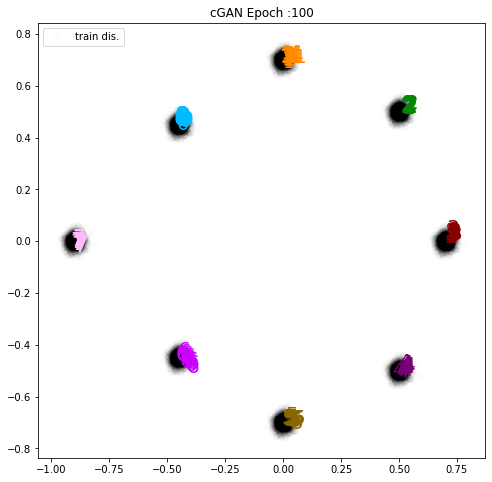

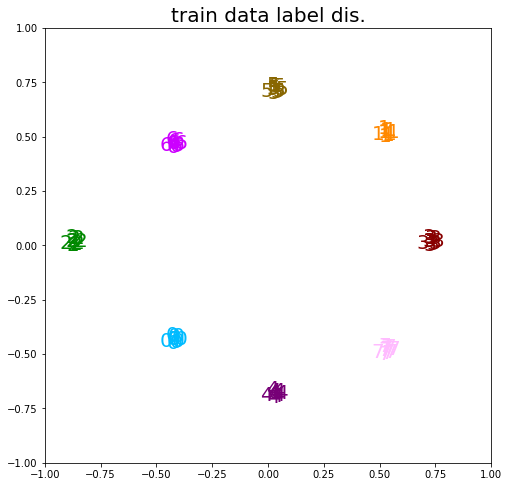

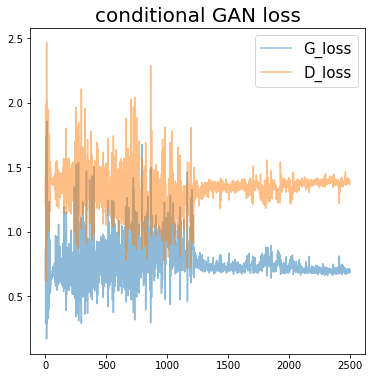

In [357]:
'''
label:
0-左下, 1-右上, 2-左, 3-右, 4-下, 5-上, 6-左上, 7-右下, 
'''
cgan_folder_name = s_date + '_cgan_sample_4/'
EPOCH = 100
z_dim = 100
#
cG_model = cG_net()
cD_model = cD_net()

cG_optim = torch.optim.Adam(cG_model.parameters(), lr = 0.0001)
cD_optim = torch.optim.Adam(cD_model.parameters(), lr = 0.0001)
bce_loss = nn.BCELoss()

if torch.cuda.is_available():
    cG_model.cuda()
    cD_model.cuda()
    bce_loss.cuda()
    
cG_loss_log , cD_loss_log = [], []
log_index = 0
# noise_z pair label sample
# ===========================================================
test_batch = 20
test_noise_z0 = torch.randn(test_batch, z_dim)
test_label_0 = torch.zeros(test_batch, 1) # 0-左下
test_noise_z1 = torch.randn(test_batch, z_dim)
test_label_1 = torch.ones(test_batch, 1) # 1-右上
test_noise_z2 = torch.randn(test_batch, z_dim)
test_label_2 = torch.ones(test_batch, 1)*2 # 2-左
test_noise_z3 = torch.randn(test_batch, z_dim)
test_label_3 = torch.ones(test_batch, 1)*3 # 3-右
test_noise_z4 = torch.randn(test_batch, z_dim)
test_label_4 = torch.ones(test_batch, 1)*4 # 4-下
test_noise_z5 = torch.randn(test_batch, z_dim)
test_label_5 = torch.ones(test_batch, 1)*5 # 5-上
test_noise_z6 = torch.randn(test_batch, z_dim)
test_label_6 = torch.ones(test_batch, 1)*6 # 6-左上
test_noise_z7 = torch.randn(test_batch, z_dim)
test_label_7 = torch.ones(test_batch, 1)*7 # 7-右下
# =============================================================
for epoch in range(EPOCH):
    for n, (Data, Label) in enumerate(Dataloader):
        
        real_valid = torch.ones(Data.size(0), 1)
        fake_valid = torch.zeros(Data.size(0), 1)
        noise_z = torch.randn(Data.size(0), z_dim)
        real_data = Data
        real_label = Label
        if torch.cuda.is_available():
            real_valid = real_valid.cuda()
            fake_valid = fake_valid.cuda()
            noise_z = noise_z.cuda()
            real_data = real_data.cuda()
            real_label = real_label.cuda()
        # train G
        cG_optim.zero_grad()
        syn_data = cG_model(noise_z, real_label)
        g_loss = bce_loss(cD_model(syn_data) , real_valid)
        g_loss.backward()
        cG_optim.step()
        
        # train D
        cD_optim.zero_grad()
        d_real_loss = bce_loss(cD_model(real_data) , real_valid)
        d_fake_loss = bce_loss(cD_model(syn_data.detach()), fake_valid)
        d_loss = (d_real_loss + d_fake_loss)
        d_loss.backward()
        cD_optim.step()
        
        # 
        if log_index % 20 == 0:
            cG_loss_log.append(g_loss)
            cD_loss_log.append(d_loss)
        log_index += 1
        
    with torch.no_grad():
        plt.clf()
        plt.close()
        if torch.cuda.is_available():
            test_noise_z0 = test_noise_z0.cuda()
            test_label_0 = test_label_0.cuda()
            
            test_noise_z1 = test_noise_z1.cuda()
            test_label_1 = test_label_1.cuda()
            
            test_noise_z2 = test_noise_z2.cuda()
            test_label_2 = test_label_2.cuda()
            
            test_noise_z3 = test_noise_z3.cuda()
            test_label_3 = test_label_3.cuda()
            
            test_noise_z4 = test_noise_z4.cuda()
            test_label_4 = test_label_4.cuda()
            
            test_noise_z5 = test_noise_z5.cuda()
            test_label_5 = test_label_5.cuda()
            
            test_noise_z6 = test_noise_z6.cuda()
            test_label_6 = test_label_6.cuda()
            
            test_noise_z7 = test_noise_z7.cuda()
            test_label_7 = test_label_7.cuda()
            
        syn_dis_0 = cG_model(test_noise_z0, test_label_0)
        syn_dis_1 = cG_model(test_noise_z1, test_label_1)
        syn_dis_2 = cG_model(test_noise_z2, test_label_2)
        syn_dis_3 = cG_model(test_noise_z3, test_label_3)
        syn_dis_4 = cG_model(test_noise_z4, test_label_4)
        syn_dis_5 = cG_model(test_noise_z5, test_label_5)
        syn_dis_6 = cG_model(test_noise_z6, test_label_6)
        syn_dis_7 = cG_model(test_noise_z7, test_label_7)
        
        train_dis = Train_Data
        
        if syn_dis_1.is_cuda:
            syn_dis_0 = syn_dis_0.data.cpu().numpy()
            syn_dis_1 = syn_dis_1.data.cpu().numpy()
            syn_dis_2 = syn_dis_2.data.cpu().numpy()
            syn_dis_3 = syn_dis_3.data.cpu().numpy()
            syn_dis_4 = syn_dis_4.data.cpu().numpy()
            syn_dis_5 = syn_dis_5.data.cpu().numpy()
            syn_dis_6 = syn_dis_6.data.cpu().numpy()
            syn_dis_7 = syn_dis_7.data.cpu().numpy()
            train_dis = train_dis.data.cpu().numpy()
        else:
            syn_dis_0 = syn_dis_0.data.numpy()
            syn_dis_1 = syn_dis_1.data.numpy()
            syn_dis_2 = syn_dis_2.data.numpy()
            syn_dis_3 = syn_dis_3.data.numpy()
            syn_dis_4 = syn_dis_4.data.numpy()
            syn_dis_5 = syn_dis_5.data.numpy()
            syn_dis_6 = syn_dis_6.data.numpy()
            syn_dis_7 = syn_dis_7.data.numpy()

            train_dis = train_dis.data.numpy()
            
        fig = plt.figure(figsize = (8, 8) )
        plt.title('cGAN Epoch :'+str(epoch+1))
        plt.plot(train_dis[:, 0], train_dis[:, 1],'o',alpha = 0.01, color = '#000000', label = 'train dis.')
        for kk in range(test_batch):
            plt.text(syn_dis_0[kk:kk+1, 0], syn_dis_0[kk:kk+1, 1], '0', fontsize = 20, color = '#00BBFF')
            plt.text(syn_dis_1[kk:kk+1, 0], syn_dis_1[kk:kk+1, 1], '1', fontsize = 20, color = '#FF8800')
            plt.text(syn_dis_2[kk:kk+1, 0], syn_dis_2[kk:kk+1, 1], '2', fontsize = 20, color = '#008800')
            plt.text(syn_dis_3[kk:kk+1, 0], syn_dis_3[kk:kk+1, 1], '3', fontsize = 20, color = '#880000')
            plt.text(syn_dis_4[kk:kk+1, 0], syn_dis_4[kk:kk+1, 1], '4', fontsize = 20, color = '#770077')
            plt.text(syn_dis_5[kk:kk+1, 0], syn_dis_5[kk:kk+1, 1], '5', fontsize = 20, color = '#886600')
            plt.text(syn_dis_6[kk:kk+1, 0], syn_dis_6[kk:kk+1, 1], '6', fontsize = 20, color = '#CC00FF')
            plt.text(syn_dis_7[kk:kk+1, 0], syn_dis_7[kk:kk+1, 1], '7', fontsize = 20, color = '#FFBBFF')
#         plt.plot(syn_dis_0[:, 0], syn_dis_0[:, 1], '.', alpha = 0.7, label = 'syn. left_down')
#         plt.plot(syn_dis_1[:, 0], syn_dis_1[:, 1], '.', alpha = 0.7, label = 'syn. right_up')
#         plt.plot(syn_dis_2[:, 0], syn_dis_2[:, 1], '.', alpha = 0.7, label = 'syn. left')
#         plt.plot(syn_dis_3[:, 0], syn_dis_3[:, 1], '.', alpha = 0.7, label = 'syn. right')
#         plt.plot(syn_dis_4[:, 0], syn_dis_4[:, 1], '.', alpha = 0.7, label = 'syn. down')
#         plt.plot(syn_dis_5[:, 0], syn_dis_5[:, 1], '.', alpha = 0.7, label = 'syn. up')
#         plt.plot(syn_dis_6[:, 0], syn_dis_6[:, 1], '.', alpha = 0.7, label = 'syn. left_up')
#         plt.plot(syn_dis_7[:, 0], syn_dis_7[:, 1], '.', alpha = 0.7, label = 'syn. right_down')
    
#         plt.xlim(-1, 1)
#         plt.ylim(-1, 1)
        plt.legend(fontsize=10,loc = 2)
        
        if not os.path.isdir(Save_Path+cgan_folder_name):
            os.mkdir(Save_Path+cgan_folder_name)
            plt.savefig(Save_Path+cgan_folder_name+'epoch_'+str(epoch+1)+'.png')
        else:
            plt.savefig(Save_Path+cgan_folder_name+'epoch_'+str(epoch+1)+'.png')
# train data
fig = plt.figure(figsize = (8, 8))
plt.title('train data label dis.', size = 20)
for kk in range(10):
    plt.text(sample_dis_0[kk:kk+1, 0].data.numpy(), sample_dis_0[kk:kk+1, 1].data.numpy(), '0', fontsize = 20, color = '#00BBFF')
    plt.text(sample_dis_1[kk:kk+1, 0].data.numpy(), sample_dis_1[kk:kk+1, 1].data.numpy(), '1', fontsize = 20, color = '#FF8800')
    plt.text(sample_dis_2[kk:kk+1, 0].data.numpy(), sample_dis_2[kk:kk+1, 1].data.numpy(), '2', fontsize = 20, color = '#008800')
    plt.text(sample_dis_3[kk:kk+1, 0].data.numpy(), sample_dis_3[kk:kk+1, 1].data.numpy(), '3', fontsize = 20, color = '#880000')
    plt.text(sample_dis_4[kk:kk+1, 0].data.numpy(), sample_dis_4[kk:kk+1, 1].data.numpy(), '4', fontsize = 20, color = '#770077')
    plt.text(sample_dis_5[kk:kk+1, 0].data.numpy(), sample_dis_5[kk:kk+1, 1].data.numpy(), '5', fontsize = 20, color = '#886600')
    plt.text(sample_dis_6[kk:kk+1, 0].data.numpy(), sample_dis_6[kk:kk+1, 1].data.numpy(), '6', fontsize = 20, color = '#CC00FF')
    plt.text(sample_dis_7[kk:kk+1, 0].data.numpy(), sample_dis_7[kk:kk+1, 1].data.numpy(), '7', fontsize = 20, color = '#FFBBFF')
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)
plt.savefig(Save_Path+cgan_folder_name+'training data distribution.png')

# plot loss log
fig = plt.figure(figsize=(6, 6))
plt.title('conditional GAN loss', size = 20)
plt.plot(np.arange(len(cG_loss_log)), cG_loss_log, label = 'G_loss', alpha = 0.5)
plt.plot(np.arange(len(cD_loss_log)), cD_loss_log, label = 'D_loss', alpha = 0.5)
plt.legend(fontsize = 15)
plt.savefig(Save_Path+cgan_folder_name+'loss_log_wiht_epoch_'+str(EPOCH)+'.png')
print('training end && save')

In [62]:
# c-gan
'''
Model
跟上面相比 D 差了一個 input
==========================================
'Conditional Generative Adversarial Nets'
根據最原始的loss計算 ,可以看到 logD(x|y) + log(1 - D(G(z|y)))
In the generator the prior input noise pz(z), and y are combined in joint hidden representation, and
the adversarial training framework allows for considerable flexibility in how this hidden representation is composed. 

In the discriminator x and y are presented as inputs and to a discriminative function (embodied again by a MLP in this case)
用於照片 pair 一段文字敘述
=========================================

那麼 沒使用label輸入來自？
ans: AC_GAN 但是 比較原始的是有添加label 
'''
class cG_net_p2(nn.Module):
    def __init__(self, n_dim = 128, z_dim = 100, label_dim = 128):
        super(cG_net_p2, self).__init__()
        self.label_dim = label_dim
        
        self.fc1 = nn.Linear(z_dim+label_dim, n_dim*8)
        self.fc2 = nn.Linear(n_dim*8, n_dim*2)
        self.fc3 = nn.Linear(n_dim*2, 2)
    
        
    def forward(self, noise_z, label):
        bs = noise_z.size(0)
        label_emb = self.get_emb(label, self.label_dim )
        concat = torch.cat([noise_z, label_emb], dim = 1)
        
        x = (self.fc1(concat))
        x = nn.ReLU()(self.fc2(x))
        x = torch.tanh(self.fc3 (x))
        out = x
        
        return out
    def get_emb(self, label, emb_dim):
        # from Postional Emdding
        inputs = label
        d_model = 512
        if label.is_cuda:
            inputs = inputs.data.cpu().numpy()
        else:
            inputs = inputs.data.numpy()
        emb_pos = np.arange(emb_dim).reshape(1, emb_dim)
        angle_rates = 1/ np.power(10000, 2*(emb_pos//2) / d_model)
        
        angle_rads = inputs * angle_rates
        if len(label.shape) == 2:
            angle_rates[:, 0::2] = np.sin(angle_rates[:, 0::2])
            angle_rates[:, 1::2] = np.cos(angle_rates[:, 1::2])
        angle_rads = torch.from_numpy(angle_rads).type(torch.FloatTensor)
        if label.is_cuda:
            angle_rads = angle_rads.cuda()
            
        return angle_rads
        
class cD_net_p2(nn.Module):
    def __init__(self, n_dim = 128, label_dim = 128):
        super(cD_net_p2, self).__init__()
        self.label_dim = label_dim
        
        self.fc1 = nn.Linear(2, n_dim*4)
        self.fc2 = nn.Linear(n_dim*4 + label_dim, n_dim)
        self.fc3 = nn.Linear(n_dim, 1)
        
    def forward(self, data, label):
        bs = data.size(0)
        
        x = (self.fc1(data))
        y = self.get_emb(label, self.label_dim )
        
        concat = torch.cat([x, y], dim = 1)

        concat = nn.LeakyReLU(0.2)(self.fc2(concat))
        out = torch.sigmoid(self.fc3 (concat))
        
        return out
    def get_emb(self, label, emb_dim):
        # from Postional Emdding
        inputs = label
        d_model = 512
        if label.is_cuda:
            inputs = inputs.data.cpu().numpy()
        else:
            inputs = inputs.data.numpy()
        emb_pos = np.arange(emb_dim).reshape(1, emb_dim)
        angle_rates = 1/ np.power(10000, 2*(emb_pos//2) / d_model)
        
        angle_rads = inputs * angle_rates
        if len(label.shape) == 2:
            angle_rates[:, 0::2] = np.sin(angle_rates[:, 0::2])
            angle_rates[:, 1::2] = np.cos(angle_rates[:, 1::2])
        angle_rads = torch.from_numpy(angle_rads).type(torch.FloatTensor)
        if label.is_cuda:
            angle_rads = angle_rads.cuda()
            
        return angle_rads
    
        
# ==
if __name__ == '__main__':
    bs = 32
    noise = torch.rand(bs, 100)
    data = torch.rand(bs, 2)
    label = torch.rand(bs, 1)
    
    model = cG_net_p2()
    out = model(noise, label)
    print('G output shape :', out.size())
    
    model = cD_net_p2()
    out = model(data, label)
    print('D output shape :', out.size())

G output shape : torch.Size([32, 2])
D output shape : torch.Size([32, 1])


training end && save


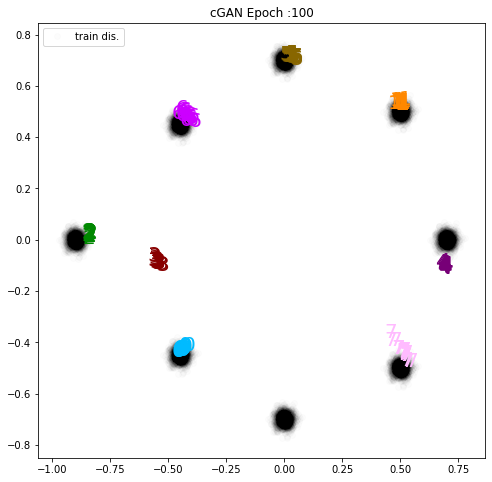

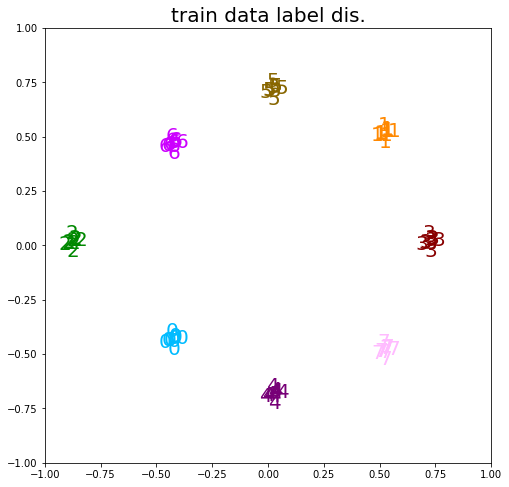

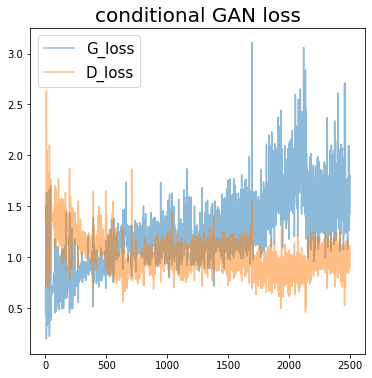

In [63]:
'''
label:
0-左下, 1-右上, 2-左, 3-右, 4-下, 5-上, 6-左上, 7-右下, 
'''
cgan_folder_name = s_date + '_cgan_original_sample_2/'
EPOCH = 100
z_dim = 100
#
cG_model = cG_net_p2()
cD_model = cD_net_p2()

cG_optim = torch.optim.Adam(cG_model.parameters(), lr = 0.0001)
cD_optim = torch.optim.Adam(cD_model.parameters(), lr = 0.0001)
bce_loss = nn.BCELoss()

if torch.cuda.is_available():
    cG_model.cuda()
    cD_model.cuda()
    bce_loss.cuda()
    
cG_loss_log , cD_loss_log = [], []
log_index = 0
# noise_z pair label sample
# ===========================================================
test_batch = 20
test_noise_z0 = torch.randn(test_batch, z_dim)
test_label_0 = torch.zeros(test_batch, 1) # 0-左下
test_noise_z1 = torch.randn(test_batch, z_dim)
test_label_1 = torch.ones(test_batch, 1) # 1-右上
test_noise_z2 = torch.randn(test_batch, z_dim)
test_label_2 = torch.ones(test_batch, 1)*2 # 2-左
test_noise_z3 = torch.randn(test_batch, z_dim)
test_label_3 = torch.ones(test_batch, 1)*3 # 3-右
test_noise_z4 = torch.randn(test_batch, z_dim)
test_label_4 = torch.ones(test_batch, 1)*4 # 4-下
test_noise_z5 = torch.randn(test_batch, z_dim)
test_label_5 = torch.ones(test_batch, 1)*5 # 5-上
test_noise_z6 = torch.randn(test_batch, z_dim)
test_label_6 = torch.ones(test_batch, 1)*6 # 6-左上
test_noise_z7 = torch.randn(test_batch, z_dim)
test_label_7 = torch.ones(test_batch, 1)*7 # 7-右下
# =============================================================
for epoch in range(EPOCH):
    for n, (Data, Label) in enumerate(Dataloader):
        
        real_valid = torch.ones(Data.size(0), 1)
        fake_valid = torch.zeros(Data.size(0), 1)
        noise_z = torch.randn(Data.size(0), z_dim)
        real_data = Data
        real_label = Label
        if torch.cuda.is_available():
            real_valid = real_valid.cuda()
            fake_valid = fake_valid.cuda()
            noise_z = noise_z.cuda()
            real_data = real_data.cuda()
            real_label = real_label.cuda()
        # train G
        cG_optim.zero_grad()
        syn_data = cG_model(noise_z, real_label)
        g_loss = bce_loss(cD_model(syn_data, real_label) , real_valid)
        g_loss.backward()
        cG_optim.step()
        
        # train D
        cD_optim.zero_grad()
        d_real_loss = bce_loss(cD_model(real_data, real_label) , real_valid)
        d_fake_loss = bce_loss(cD_model(syn_data.detach(), real_label), fake_valid)
        d_loss = (d_real_loss + d_fake_loss)
        d_loss.backward()
        cD_optim.step()
        
        # 
        if log_index % 20 == 0:
            cG_loss_log.append(g_loss)
            cD_loss_log.append(d_loss)
        log_index += 1
        
    with torch.no_grad():
        plt.clf()
        plt.close()
        if torch.cuda.is_available():
            test_noise_z0 = test_noise_z0.cuda()
            test_label_0 = test_label_0.cuda()
            
            test_noise_z1 = test_noise_z1.cuda()
            test_label_1 = test_label_1.cuda()
            
            test_noise_z2 = test_noise_z2.cuda()
            test_label_2 = test_label_2.cuda()
            
            test_noise_z3 = test_noise_z3.cuda()
            test_label_3 = test_label_3.cuda()
            
            test_noise_z4 = test_noise_z4.cuda()
            test_label_4 = test_label_4.cuda()
            
            test_noise_z5 = test_noise_z5.cuda()
            test_label_5 = test_label_5.cuda()
            
            test_noise_z6 = test_noise_z6.cuda()
            test_label_6 = test_label_6.cuda()
            
            test_noise_z7 = test_noise_z7.cuda()
            test_label_7 = test_label_7.cuda()
            
        syn_dis_0 = cG_model(test_noise_z0, test_label_0)
        syn_dis_1 = cG_model(test_noise_z1, test_label_1)
        syn_dis_2 = cG_model(test_noise_z2, test_label_2)
        syn_dis_3 = cG_model(test_noise_z3, test_label_3)
        syn_dis_4 = cG_model(test_noise_z4, test_label_4)
        syn_dis_5 = cG_model(test_noise_z5, test_label_5)
        syn_dis_6 = cG_model(test_noise_z6, test_label_6)
        syn_dis_7 = cG_model(test_noise_z7, test_label_7)
        
        train_dis = Train_Data
        
        if syn_dis_1.is_cuda:
            syn_dis_0 = syn_dis_0.data.cpu().numpy()
            syn_dis_1 = syn_dis_1.data.cpu().numpy()
            syn_dis_2 = syn_dis_2.data.cpu().numpy()
            syn_dis_3 = syn_dis_3.data.cpu().numpy()
            syn_dis_4 = syn_dis_4.data.cpu().numpy()
            syn_dis_5 = syn_dis_5.data.cpu().numpy()
            syn_dis_6 = syn_dis_6.data.cpu().numpy()
            syn_dis_7 = syn_dis_7.data.cpu().numpy()
            train_dis = train_dis.data.cpu().numpy()
        else:
            syn_dis_0 = syn_dis_0.data.numpy()
            syn_dis_1 = syn_dis_1.data.numpy()
            syn_dis_2 = syn_dis_2.data.numpy()
            syn_dis_3 = syn_dis_3.data.numpy()
            syn_dis_4 = syn_dis_4.data.numpy()
            syn_dis_5 = syn_dis_5.data.numpy()
            syn_dis_6 = syn_dis_6.data.numpy()
            syn_dis_7 = syn_dis_7.data.numpy()

            train_dis = train_dis.data.numpy()
            
        fig = plt.figure(figsize = (8, 8) )
        plt.title('cGAN Epoch :'+str(epoch+1))
        plt.plot(train_dis[:, 0], train_dis[:, 1],'o',alpha = 0.01, color = '#000000', label = 'train dis.')
        for kk in range(test_batch):
            plt.text(syn_dis_0[kk:kk+1, 0], syn_dis_0[kk:kk+1, 1], '0', fontsize = 20, color = '#00BBFF')
            plt.text(syn_dis_1[kk:kk+1, 0], syn_dis_1[kk:kk+1, 1], '1', fontsize = 20, color = '#FF8800')
            plt.text(syn_dis_2[kk:kk+1, 0], syn_dis_2[kk:kk+1, 1], '2', fontsize = 20, color = '#008800')
            plt.text(syn_dis_3[kk:kk+1, 0], syn_dis_3[kk:kk+1, 1], '3', fontsize = 20, color = '#880000')
            plt.text(syn_dis_4[kk:kk+1, 0], syn_dis_4[kk:kk+1, 1], '4', fontsize = 20, color = '#770077')
            plt.text(syn_dis_5[kk:kk+1, 0], syn_dis_5[kk:kk+1, 1], '5', fontsize = 20, color = '#886600')
            plt.text(syn_dis_6[kk:kk+1, 0], syn_dis_6[kk:kk+1, 1], '6', fontsize = 20, color = '#CC00FF')
            plt.text(syn_dis_7[kk:kk+1, 0], syn_dis_7[kk:kk+1, 1], '7', fontsize = 20, color = '#FFBBFF')

        plt.legend(fontsize=10,loc = 2)
        
        if not os.path.isdir(Save_Path+cgan_folder_name):
            os.mkdir(Save_Path+cgan_folder_name)
            plt.savefig(Save_Path+cgan_folder_name+'epoch_'+str(epoch+1)+'.png')
        else:
            plt.savefig(Save_Path+cgan_folder_name+'epoch_'+str(epoch+1)+'.png')
# train data
fig = plt.figure(figsize = (8, 8))
plt.title('train data label dis.', size = 20)
for kk in range(10):
    plt.text(sample_dis_0[kk:kk+1, 0].data.numpy(), sample_dis_0[kk:kk+1, 1].data.numpy(), '0', fontsize = 20, color = '#00BBFF')
    plt.text(sample_dis_1[kk:kk+1, 0].data.numpy(), sample_dis_1[kk:kk+1, 1].data.numpy(), '1', fontsize = 20, color = '#FF8800')
    plt.text(sample_dis_2[kk:kk+1, 0].data.numpy(), sample_dis_2[kk:kk+1, 1].data.numpy(), '2', fontsize = 20, color = '#008800')
    plt.text(sample_dis_3[kk:kk+1, 0].data.numpy(), sample_dis_3[kk:kk+1, 1].data.numpy(), '3', fontsize = 20, color = '#880000')
    plt.text(sample_dis_4[kk:kk+1, 0].data.numpy(), sample_dis_4[kk:kk+1, 1].data.numpy(), '4', fontsize = 20, color = '#770077')
    plt.text(sample_dis_5[kk:kk+1, 0].data.numpy(), sample_dis_5[kk:kk+1, 1].data.numpy(), '5', fontsize = 20, color = '#886600')
    plt.text(sample_dis_6[kk:kk+1, 0].data.numpy(), sample_dis_6[kk:kk+1, 1].data.numpy(), '6', fontsize = 20, color = '#CC00FF')
    plt.text(sample_dis_7[kk:kk+1, 0].data.numpy(), sample_dis_7[kk:kk+1, 1].data.numpy(), '7', fontsize = 20, color = '#FFBBFF')
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)
plt.savefig(Save_Path+cgan_folder_name+'training data distribution.png')

# plot loss log
fig = plt.figure(figsize=(6, 6))
plt.title('conditional GAN loss', size = 20)
plt.plot(np.arange(len(cG_loss_log)), cG_loss_log, label = 'G_loss', alpha = 0.5)
plt.plot(np.arange(len(cD_loss_log)), cD_loss_log, label = 'D_loss', alpha = 0.5)
plt.legend(fontsize = 15)
plt.savefig(Save_Path+cgan_folder_name+'loss_log_wiht_epoch_'+str(EPOCH)+'.png')
print('training end && save')

In [208]:
'''
c-gan sample Issue:
    the result not to pair label and Data
    maybe D is so weak
從自設的sample data 當training data
可以看到 僅有幾個label 跟 pred_output的distribution是相配的
大多數都是不匹配的
除了比沒有使用label的情況下,分佈(distribution)能被分的更清楚外
從結果看 Discriminator是否太弱？或者 input 輸入 dis 的dim資訊太低(input_dim = 2)
可以嘗試較流通的方法 nn.embedding 的方式 看有什麼結果
'''



G output shape : torch.Size([32, 2])
D output shape : torch.Size([32, 1])


In [374]:
# ac-gan
'''
Model

'''
class AcG_net(nn.Module):
    def __init__(self, n_dim = 128, z_dim = 100, label_dim = 128):
        super(AcG_net, self).__init__()
        self.label_dim = label_dim
        
        self.z_fc = nn.Linear(z_dim, n_dim*4)
        self.fc1 = nn.Linear(n_dim*4 +label_dim, n_dim*8)
        self.fc2 = nn.Linear(n_dim*8, n_dim*2)
        self.fc3 = nn.Linear(n_dim*2, 2)
        
        self.PRelu = nn.PReLU()
        
    def forward(self, noise_z, label):
        bs = noise_z.size(0)
        label_emb = self.get_emb(label, self.label_dim )
        z = self.z_fc(noise_z)
        concat = torch.cat([z, label_emb], dim = 1)
        
        x = (self.fc1(concat))
        x = nn.ReLU()(self.fc2(x))
        x = torch.tanh(self.fc3 (x))
        out = x
        
        return out
    def get_emb(self, label, emb_dim):
        # from Postional Emdding
        inputs = label
        d_model = 512
        if label.is_cuda:
            inputs = inputs.data.cpu().numpy()
        else:
            inputs = inputs.data.numpy()
        emb_pos = np.arange(emb_dim).reshape(1, emb_dim)
        angle_rates = 1/ np.power(10000, 2*(emb_pos//2) / d_model)
        
        angle_rads = inputs * angle_rates
        if len(label.shape) == 2:
            angle_rates[:, 0::2] = np.sin(angle_rates[:, 0::2])
            angle_rates[:, 1::2] = np.cos(angle_rates[:, 1::2])
        angle_rads = torch.from_numpy(angle_rads).type(torch.FloatTensor)
        if label.is_cuda:
            angle_rads = angle_rads.cuda()
            
        return angle_rads
        
class AcD_net(nn.Module):
    def __init__(self, n_dim = 128):
        super(AcD_net, self).__init__()
        self.n_dim = n_dim
        
        self.fc1 = nn.Linear(2, n_dim*8)
        
        self.fc2 = nn.Linear(n_dim*8, n_dim)
        self.fc3 = nn.Linear(n_dim, 1)
        
        self.aux_fc2 = nn.Linear(n_dim*8, n_dim)
        self.aux_fc3 = nn.Linear(n_dim, 8)
        
    def forward(self, data):
        
        bs = data.size(0)
        x = data
#         pos_x = self.get_data_emb(data[:, :1], 10)
#         pos_y = self.get_data_emb(data[:, 1:], 10)

#         x = torch.cat([pos_x, pos_y], dim = 1)

        x = (self.fc1(x))
        valid_out = nn.ReLU()(self.fc2(x))
        valid_out = torch.sigmoid(self.fc3 (valid_out))
        
        aux_out = nn.ReLU()(self.aux_fc2(x))
        aux_out = nn.Softmax(dim=-1)(self.aux_fc3(aux_out))
        
        return valid_out, aux_out
    
#     def get_data_emb(self, in_data, emb_dim ):
#         inputs = in_data
#         d_model = 10
#         if in_data.is_cuda:
#             inputs = inputs.data.cpu().numpy()
#         else:
#             inputs = inputs.data.numpy()
#         emb_pos = np.arange(emb_dim).reshape(1, emb_dim)
#         angle_rates = 1/ np.power(10000, 2*(emb_pos//2) / d_model)
        
#         angle_rads = inputs * angle_rates
#         if len(label.shape) == 2:
#             angle_rates[:, 0::2] = np.sin(angle_rates[:, 0::2])
#             angle_rates[:, 1::2] = np.cos(angle_rates[:, 1::2])
#         angle_rads = torch.from_numpy(angle_rads).type(torch.FloatTensor)
#         if in_data.is_cuda:
#             angle_rads = angle_rads.cuda()
            
#         return angle_rads
# ==
if __name__ == '__main__':
    bs = 32
    noise = torch.rand(bs, 100)
    data = torch.rand(bs, 2)
    label = torch.rand(bs, 1)
    
    model = AcG_net()
    out = model(noise, label)
    print('G output shape :', out.size())
    
    model = AcD_net()
    valid_out , aux_out= model(data)
    print('D valid_out shape :', valid_out.size())
    print('D aux_out shape :', aux_out.size())


G output shape : torch.Size([32, 2])
D valid_out shape : torch.Size([32, 1])
D aux_out shape : torch.Size([32, 8])


training end && save


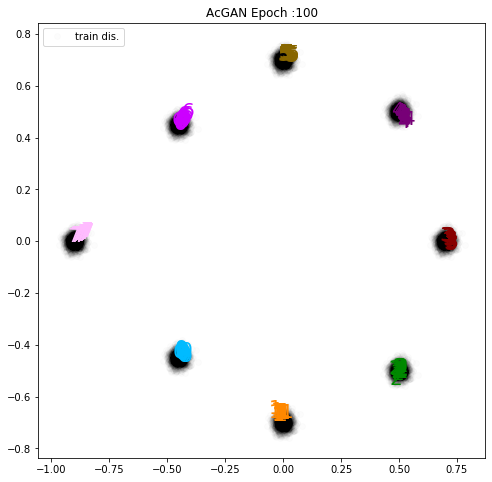

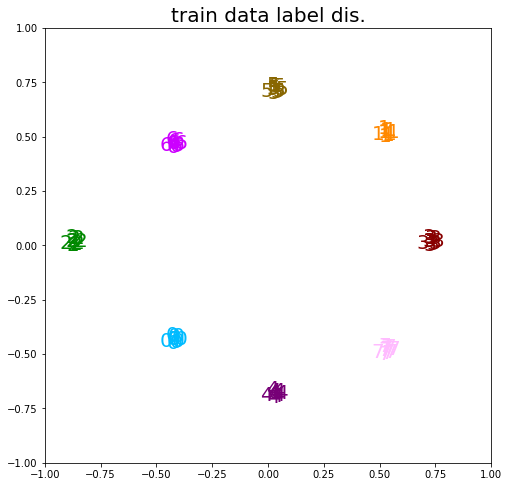

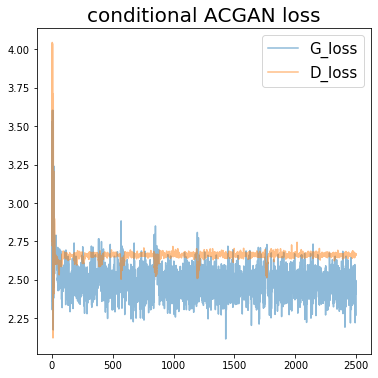

In [375]:
acgan_folder_name = s_date + '_Acgan_sample_1/'
EPOCH = 100
z_dim = 100

# test_noise && test_label
# ========================
test_batch = 20
test_noise_z0 = torch.randn(test_batch, z_dim)
test_label_0 = torch.zeros(test_batch, 1) # 0-左下
test_noise_z1 = torch.randn(test_batch, z_dim)
test_label_1 = torch.ones(test_batch, 1) # 1-右上
test_noise_z2 = torch.randn(test_batch, z_dim)
test_label_2 = torch.ones(test_batch, 1)*2 # 2-左
test_noise_z3 = torch.randn(test_batch, z_dim)
test_label_3 = torch.ones(test_batch, 1)*3 # 3-右
test_noise_z4 = torch.randn(test_batch, z_dim)
test_label_4 = torch.ones(test_batch, 1)*4 # 4-下
test_noise_z5 = torch.randn(test_batch, z_dim)
test_label_5 = torch.ones(test_batch, 1)*5 # 5-上
test_noise_z6 = torch.randn(test_batch, z_dim)
test_label_6 = torch.ones(test_batch, 1)*6 # 6-左上
test_noise_z7 = torch.randn(test_batch, z_dim)
test_label_7 = torch.ones(test_batch, 1)*7 # 7-右下
# =========================================
ac_G_model = AcG_net()
ac_D_model = AcD_net()

ac_G_optim = torch.optim.Adam(ac_G_model.parameters(), lr = 0.0001)
ac_D_optim = torch.optim.Adam(ac_D_model.parameters(), lr = 0.0001)

loss_ce = nn.CrossEntropyLoss()
loss_bce = nn.BCELoss()
if torch.cuda.is_available():
    ac_G_model.cuda()
    ac_D_model.cuda()
    loss_ce.cuda()
    loss_bce.cuda()

ac_G_loss_log, ac_D_loss_log = [], []
log_index = 0
for epoch in range(EPOCH):
    for n, (Data, Label) in enumerate(Dataloader):
        real_valid = torch.ones(Data.size(0), 1)
        fake_valid = torch.zeros(Data.size(0), 1)
        real_data = Data
        real_label = Label
        real_label_aux = Label.type(torch.LongTensor)
        noise_z = torch.randn(Data.size(0), z_dim)
        
        if torch.cuda.is_available():
            real_valid = real_valid.cuda()
            fake_valid = fake_valid.cuda()
            real_data = real_data.cuda()
            real_label = real_label.cuda()
            noise_z = noise_z.cuda()
            real_label_aux = real_label_aux.cuda()
            
        # train G
        ac_G_optim.zero_grad()
        syn_data = ac_G_model(noise_z, real_label)
        
        g_valid_loss = loss_bce(ac_D_model(syn_data)[0], real_valid)
        g_aux_loss = loss_ce(ac_D_model(syn_data)[1], real_label_aux.reshape(Data.size(0)))
        g_loss = g_valid_loss + g_aux_loss
        g_loss.backward()
        ac_G_optim.step()
        
        # train D
        ac_D_optim.zero_grad()
        
        d_real_valid_loss = loss_bce(ac_D_model(real_data)[0], real_valid)
        d_real_aux_loss = loss_ce(ac_D_model(real_data)[1], real_label_aux.reshape(Data.size(0)))
        d_real_loss = d_real_valid_loss + d_real_aux_loss
        
        d_fake_valid_loss = loss_bce(ac_D_model(syn_data.detach())[0], fake_valid)
        #
#         d_fake_aux_loss = loss_ce(ac_D_model(syn_data.detach())[1], real_label_aux.reshape(Data.size(0))) 
#         d_fake_loss = d_fake_valid_loss +d_fake_aux_loss
        d_fake_loss = d_fake_valid_loss 

        d_loss = d_real_loss+ d_fake_loss

        d_loss.backward()
        ac_D_optim.step()
        # 
        if log_index % 20 == 0:
            ac_G_loss_log.append(g_loss)
            ac_D_loss_log.append(d_loss)
        log_index += 1
        
    with torch.no_grad():
        plt.clf()
        plt.close()
        if torch.cuda.is_available():
            test_noise_z0 = test_noise_z0.cuda()
            test_label_0 = test_label_0.cuda()
            
            test_noise_z1 = test_noise_z1.cuda()
            test_label_1 = test_label_1.cuda()
            
            test_noise_z2 = test_noise_z2.cuda()
            test_label_2 = test_label_2.cuda()
            
            test_noise_z3 = test_noise_z3.cuda()
            test_label_3 = test_label_3.cuda()
            
            test_noise_z4 = test_noise_z4.cuda()
            test_label_4 = test_label_4.cuda()
            
            test_noise_z5 = test_noise_z5.cuda()
            test_label_5 = test_label_5.cuda()
            
            test_noise_z6 = test_noise_z6.cuda()
            test_label_6 = test_label_6.cuda()
            
            test_noise_z7 = test_noise_z7.cuda()
            test_label_7 = test_label_7.cuda()
            
        syn_dis_0 = ac_G_model(test_noise_z0, test_label_0)
        syn_dis_1 = ac_G_model(test_noise_z1, test_label_1)
        syn_dis_2 = ac_G_model(test_noise_z2, test_label_2)
        syn_dis_3 = ac_G_model(test_noise_z3, test_label_3)
        syn_dis_4 = ac_G_model(test_noise_z4, test_label_4)
        syn_dis_5 = ac_G_model(test_noise_z5, test_label_5)
        syn_dis_6 = ac_G_model(test_noise_z6, test_label_6)
        syn_dis_7 = ac_G_model(test_noise_z7, test_label_7)
        
        train_dis = Train_Data
        
        if syn_dis_0.is_cuda:
            syn_dis_0 = syn_dis_0.data.cpu().numpy()
            syn_dis_1 = syn_dis_1.data.cpu().numpy()
            syn_dis_2 = syn_dis_2.data.cpu().numpy()
            syn_dis_3 = syn_dis_3.data.cpu().numpy()
            syn_dis_4 = syn_dis_4.data.cpu().numpy()
            syn_dis_5 = syn_dis_5.data.cpu().numpy()
            syn_dis_6 = syn_dis_6.data.cpu().numpy()
            syn_dis_7 = syn_dis_7.data.cpu().numpy()
            
            train_dis = train_dis.data.cpu().numpy()
        else:
            syn_dis_0 = syn_dis_0.data.numpy()
            syn_dis_1 = syn_dis_1.data.numpy()
            syn_dis_2 = syn_dis_2.data.numpy()
            syn_dis_3 = syn_dis_3.data.numpy()
            syn_dis_4 = syn_dis_4.data.numpy()
            syn_dis_5 = syn_dis_5.data.numpy()
            syn_dis_6 = syn_dis_6.data.numpy()
            syn_dis_7 = syn_dis_7.data.numpy()

            train_dis = train_dis.data.numpy()
        fig = plt.figure(figsize = (8, 8) )
        plt.title('AcGAN Epoch :'+str(epoch+1))
        plt.plot(train_dis[:, 0], train_dis[:, 1],'o',alpha = 0.01, color = '#000000', label = 'train dis.')
        for kk in range(test_batch):
            plt.text(syn_dis_0[kk:kk+1, 0], syn_dis_0[kk:kk+1, 1], '0', fontsize = 20, color = '#00BBFF')
            plt.text(syn_dis_1[kk:kk+1, 0], syn_dis_1[kk:kk+1, 1], '1', fontsize = 20, color = '#FF8800')
            plt.text(syn_dis_2[kk:kk+1, 0], syn_dis_2[kk:kk+1, 1], '2', fontsize = 20, color = '#008800')
            plt.text(syn_dis_3[kk:kk+1, 0], syn_dis_3[kk:kk+1, 1], '3', fontsize = 20, color = '#880000')
            plt.text(syn_dis_4[kk:kk+1, 0], syn_dis_4[kk:kk+1, 1], '4', fontsize = 20, color = '#770077')
            plt.text(syn_dis_5[kk:kk+1, 0], syn_dis_5[kk:kk+1, 1], '5', fontsize = 20, color = '#886600')
            plt.text(syn_dis_6[kk:kk+1, 0], syn_dis_6[kk:kk+1, 1], '6', fontsize = 20, color = '#CC00FF')
            plt.text(syn_dis_7[kk:kk+1, 0], syn_dis_7[kk:kk+1, 1], '7', fontsize = 20, color = '#FFBBFF')
        plt.legend(fontsize=10,loc = 2)
        
        if not os.path.isdir(Save_Path+acgan_folder_name):
            os.mkdir(Save_Path + acgan_folder_name)
            plt.savefig(Save_Path + acgan_folder_name+'epoch_'+str(epoch+1)+'.png')
        else:
            plt.savefig(Save_Path + acgan_folder_name+'epoch_'+str(epoch+1)+'.png')
            
# train data
fig = plt.figure(figsize = (8, 8))
plt.title('train data label dis.', size = 20)
for kk in range(10):
    plt.text(sample_dis_0[kk:kk+1, 0].data.numpy(), sample_dis_0[kk:kk+1, 1].data.numpy(), '0', fontsize = 20, color = '#00BBFF')
    plt.text(sample_dis_1[kk:kk+1, 0].data.numpy(), sample_dis_1[kk:kk+1, 1].data.numpy(), '1', fontsize = 20, color = '#FF8800')
    plt.text(sample_dis_2[kk:kk+1, 0].data.numpy(), sample_dis_2[kk:kk+1, 1].data.numpy(), '2', fontsize = 20, color = '#008800')
    plt.text(sample_dis_3[kk:kk+1, 0].data.numpy(), sample_dis_3[kk:kk+1, 1].data.numpy(), '3', fontsize = 20, color = '#880000')
    plt.text(sample_dis_4[kk:kk+1, 0].data.numpy(), sample_dis_4[kk:kk+1, 1].data.numpy(), '4', fontsize = 20, color = '#770077')
    plt.text(sample_dis_5[kk:kk+1, 0].data.numpy(), sample_dis_5[kk:kk+1, 1].data.numpy(), '5', fontsize = 20, color = '#886600')
    plt.text(sample_dis_6[kk:kk+1, 0].data.numpy(), sample_dis_6[kk:kk+1, 1].data.numpy(), '6', fontsize = 20, color = '#CC00FF')
    plt.text(sample_dis_7[kk:kk+1, 0].data.numpy(), sample_dis_7[kk:kk+1, 1].data.numpy(), '7', fontsize = 20, color = '#FFBBFF')
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

plt.savefig(Save_Path+acgan_folder_name+'training data distribution.png')
# plot loss log
fig = plt.figure(figsize=(6, 6))
plt.title('conditional ACGAN loss', size = 20)
plt.plot(np.arange(len(ac_G_loss_log)), ac_G_loss_log, label = 'G_loss', alpha = 0.5)
plt.plot(np.arange(len(ac_D_loss_log)), ac_D_loss_log, label = 'D_loss', alpha = 0.5)
plt.legend(fontsize = 15)
plt.savefig(Save_Path+acgan_folder_name+'loss_log_wiht_epoch_'+str(EPOCH)+'.png')
print('training end && save')        